# TASK 1 

<a name='000'></a>

<h2>Content</h2>

<ul>
    <ol type='1'>
    <li><a href='#001'>Training 4 Different Classifiers</a></li>
    <li><a href='#002'>Calculating Metrics</a></li>
    <li><a href='#003'>Plotting Metric Curves</a></li>
    <li><a href='#004'>Training Classifier That Avoids Type II Errors and Calculating Metrics</a></li>
    </ol>
</ul>

In [1]:
from sklearn import metrics, tree, ensemble
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

<a name='001'></a>

<h2>Training 4 Different Classifiers</h2>

In [2]:
df = pd.read_csv('C://Users//Daan_//Downloads//MLT-03 - Supervised learning algorithms//bioresponse.csv')
df.rename(str.lower, axis='columns', inplace=True)
df.head()

,activity,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d1767,d1768,d1769,d1770,d1771,d1772,d1773,d1774,d1775,d1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.tail()

,activity,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d1767,d1768,d1769,d1770,d1771,d1772,d1773,d1774,d1775,d1776
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0
3750,0,0.133333,0.533952,0.00,0.0,0.347966,0.757971,0.230667,0.272652,0.854116,...,0,0,0,0,0,0,0,0,0,0


- Separate training data.

In [4]:
set_train, set_test = train_test_split(df, train_size=0.75, shuffle=True)

x_train = set_train.iloc[:, 1:]
y_train = set_train.iloc[:, :1]

x_test = set_test.iloc[:, 1:]
y_test = set_test.iloc[:, :1]

- We created a function to make our work easier. 

In [5]:
def fit_model(model, train_data, test_data):
    model.fit(train_data[0], train_data[1])
    
    PR = model.predict(test_data[0])
    PRPROBA = model.predict_proba(test_data[0])
    logloss=metrics.log_loss(test_data[1],PRPROBA)
    
    print(metrics.classification_report(y_true=test_data[1], y_pred=PR))
    print('Log-Loss: {}'.format(logloss))
    
    return test_data[1], PRPROBA[:, 1]

<a name='002'></a>

<h2>Calculating Metrics</h2>

<h3><li> Small Decision Tree</li> <h3>

In [6]:
sdt_true, sdt_score = fit_model(
    model=tree.DecisionTreeClassifier(max_depth=2),
    train_data=(x_train, y_train),
    test_data=(x_test, y_test)
)

              precision    recall  f1-score   support

           0       0.77      0.67      0.71       432
           1       0.74      0.83      0.78       506

    accuracy                           0.75       938
   macro avg       0.75      0.75      0.75       938
weighted avg       0.75      0.75      0.75       938

Log-Loss: 0.5351818151167141


<h3><li> Deep decision tree</li> <h3>

In [7]:
ddt_true, ddt_score = fit_model(
    model=tree.DecisionTreeClassifier(max_depth=31),
    train_data=(x_train, y_train),
    test_data=(x_test, y_test)
)

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       432
           1       0.78      0.74      0.76       506

    accuracy                           0.75       938
   macro avg       0.75      0.75      0.75       938
weighted avg       0.75      0.75      0.75       938

Log-Loss: 8.85758265625479


<h3><li> Random Forest on Small Trees</li> <h3>

In [8]:
rfst_true, rfst_score = fit_model(
    model=ensemble.RandomForestClassifier(max_depth=2),
    train_data=(x_train, y_train),
    test_data=(x_test, y_test)
)

              precision    recall  f1-score   support

           0       0.67      0.54      0.60       432
           1       0.66      0.77      0.71       506

    accuracy                           0.67       938
   macro avg       0.67      0.66      0.66       938
weighted avg       0.67      0.67      0.66       938

Log-Loss: 0.6270882869524487


<h3><li> Random Forest on Deep Trees</li> <h3>

In [9]:
rfdt_true, rfdt_score = fit_model(
    model=ensemble.RandomForestClassifier(max_depth=14),
    train_data=(x_train, y_train),
    test_data=(x_test, y_test)
)

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       432
           1       0.82      0.81      0.82       506

    accuracy                           0.80       938
   macro avg       0.80      0.80      0.80       938
weighted avg       0.80      0.80      0.80       938

Log-Loss: 0.4616579068022832


<a name='003'></a>

<h2>Plotting Metric Curves</h2>

In [10]:
def plot_metric(y_true, y_score):
    figure, ax = plt.subplots(1, 2, figsize=(20, 5))
    sns.set_theme(style='darkgrid', palette='bright')
    sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
    
    prec = metrics.precision_recall_curve(y_true, y_score)
    roc = metrics.roc_curve(y_true, y_score)
    
    ax[0] = sns.lineplot(x=prec[0], y=prec[1], ax=ax[0])
    ax[0].set(xlabel='Recall')
    ax[0].set(ylabel='Precision')
    ax[0].set_title('Precision-Recall Curve')
    
    ax[1] = sns.lineplot(x=roc[0], y=roc[1], ax=ax[1])
    ax[1] = sns.lineplot(x=roc[1], y=roc[1], ax=ax[1], linestyle='--')
    ax[1].set(xlabel='False Positive Rate')
    ax[1].set(ylabel='True Positive Rate')
    ax[1].set_title('ROC')
    
    plt.show()

<h3><li> Small Decision Tree</li> <h3>

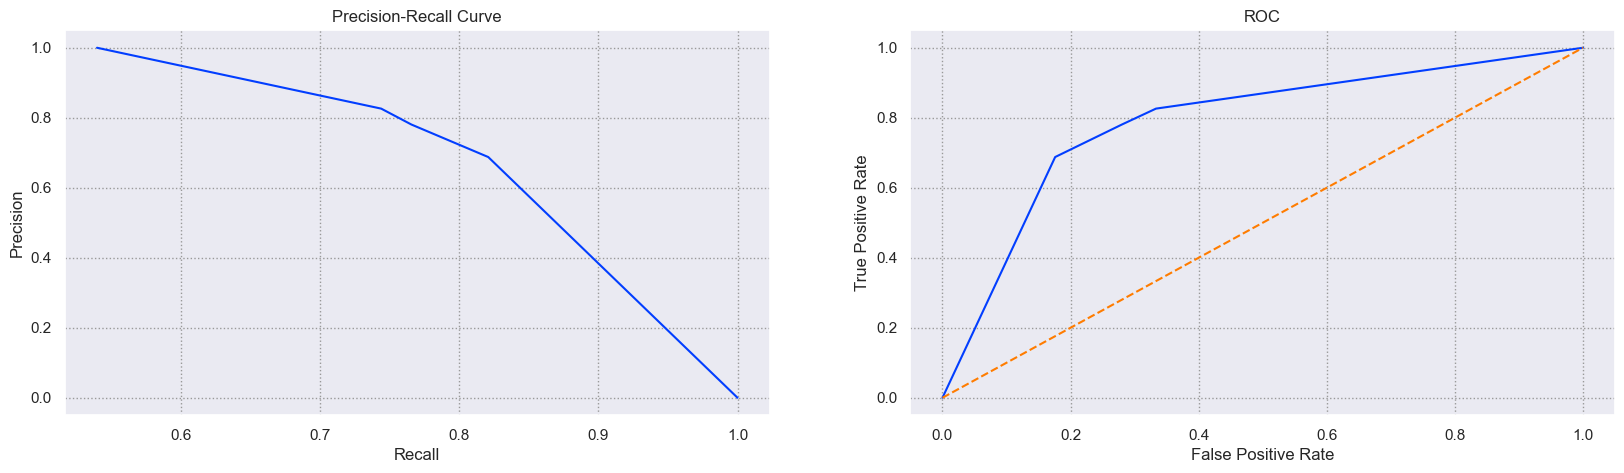

In [12]:
plot_metric(sdt_true, sdt_score)

<h3><li> Deep decision tree</li> <h3>

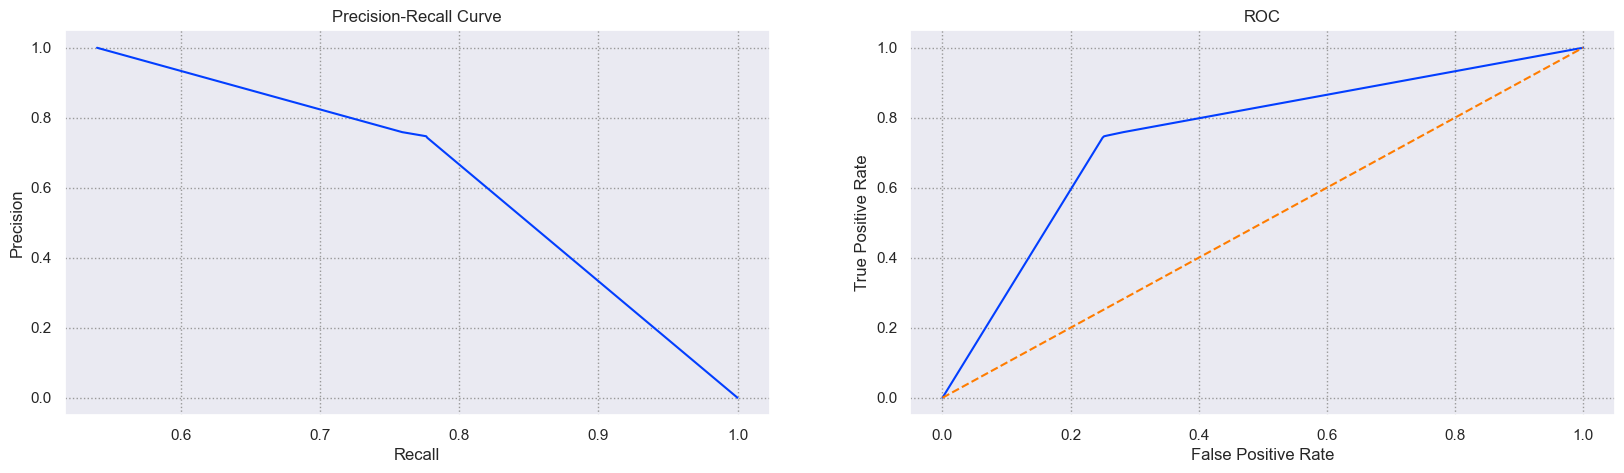

In [13]:
plot_metric(ddt_true, ddt_score)

<h3><li> Random Forest on Small Trees</li> <h3>

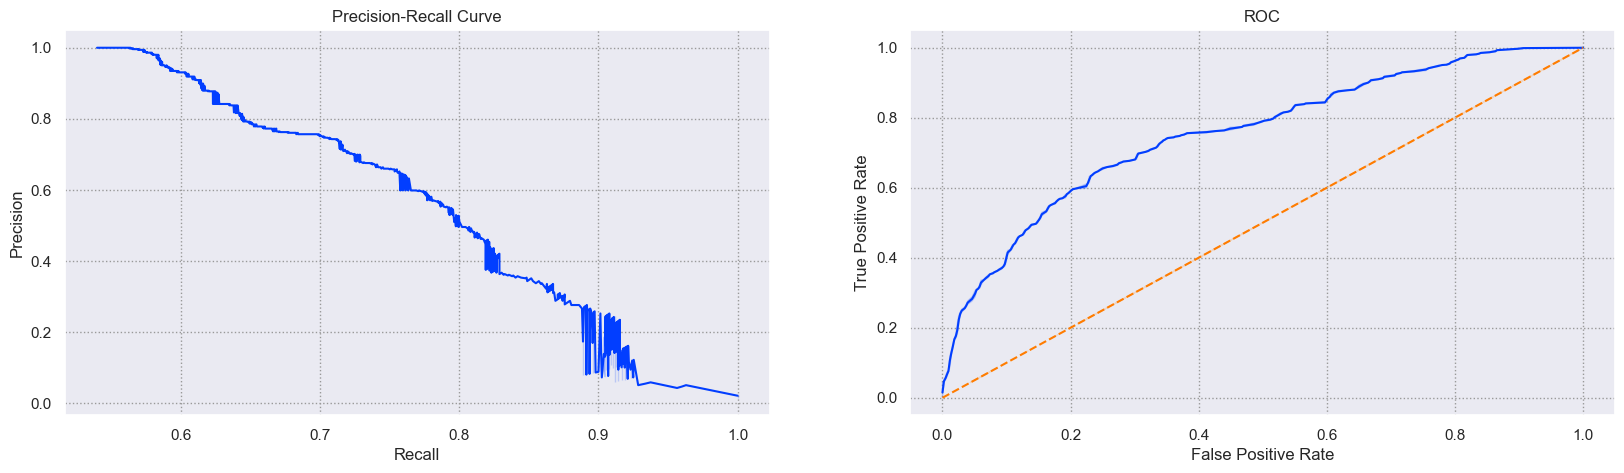

In [14]:
plot_metric(rfst_true, rfst_score)

<h3><li> Random Forest on Deep Trees</li> <h3>

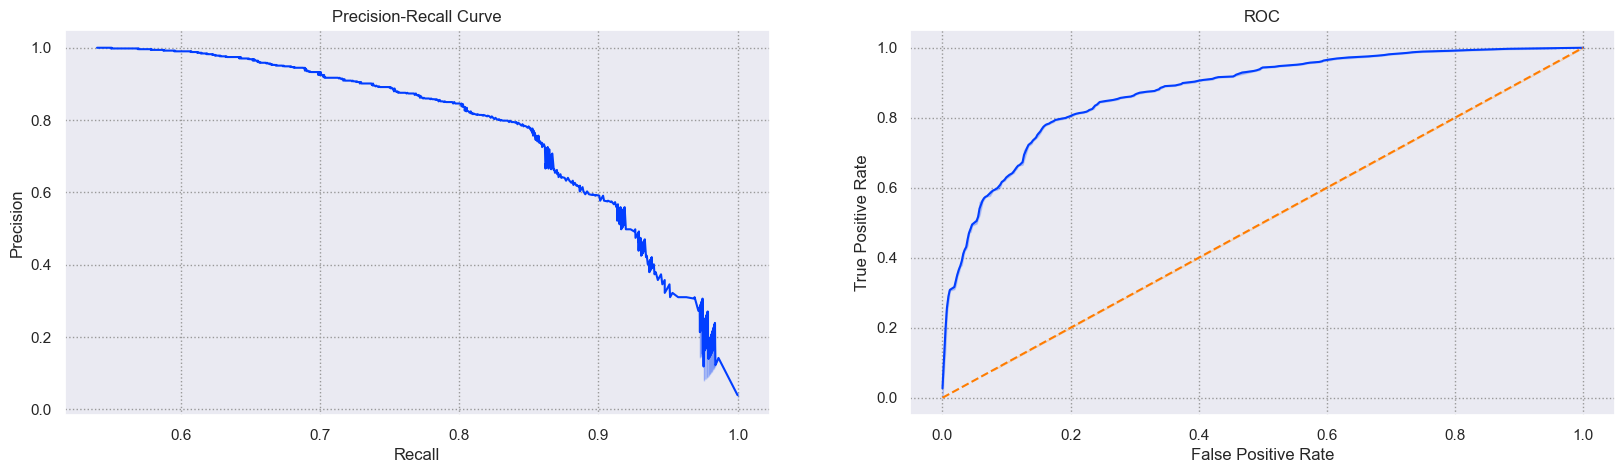

In [15]:
plot_metric(rfdt_true, rfdt_score)

<a name='004'></a>

<h2>Training Classifier That Avoids Type II Errors and Calculating Metrics</h2>

- Let's see what treshold we can use to avoid type II error with a recall greater than or equal to <b>0.95</b> and a low false negative rate.

In [16]:
MT2 = ensemble.RandomForestClassifier(criterion="entropy", max_depth=5)
MT2.fit(x_train, y_train)
Y_pred_proba = MT2.predict_proba(x_test)

ths = [] #Tresholds
rc = [] #Recalls
fnrs = [] #FNR's

for th in np.linspace(0.3, 0.5, 50):
    Y_pred = (Y_pred_proba[:,1] >= th).astype(bool)
    re = metrics.recall_score(y_test, Y_pred)
    conf = metrics.confusion_matrix(y_test, Y_pred)
    fnr = conf[1, 0] / conf.sum()
    
    rc.append(re)
    fnrs.append(fnr)
    ths.append(th)

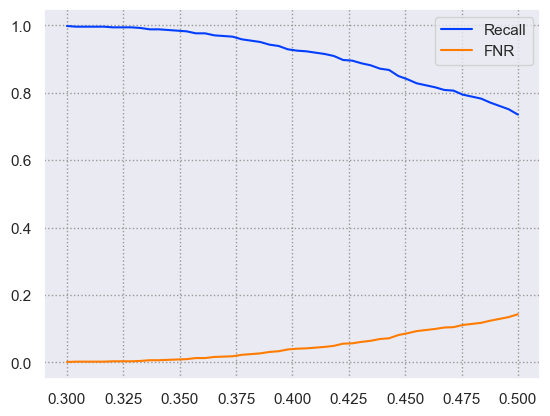

In [24]:
plt.plot(ths, rc,label="Recall")
plt.plot(ths, fnrs, label="FNR")
plt.legend()

In [19]:
def fit_model_2(th,model, train_data, test_data):
    model.fit(train_data[0], train_data[1])
    
    PR = model.predict(test_data[0])
    PRPROBA = model.predict_proba(test_data[0])
    y_pred = (PRPROBA[:,1] >= th).astype(bool)
    logloss=metrics.log_loss(test_data[1],PRPROBA)
    conf = metrics.confusion_matrix(test_data[1], y_pred)
    fnr = conf[1, 0] / conf.sum()
    
    print(metrics.classification_report(y_true=test_data[1], y_pred=y_pred))
    print('Log-Loss: {}'.format(logloss))
    print('FNR: {}'.format(fnr))
    
    return test_data[1], PRPROBA[:, 1]

- We choose a threshold of <b>0.37</b>.

In [20]:
fcl31_true, fcl31_score = fit_model_2(
    th = 0.37,
    model=ensemble.RandomForestClassifier(criterion="entropy", max_depth=5),
    train_data=(x_train, y_train),
    test_data=(x_test, y_test)
)

              precision    recall  f1-score   support

           0       0.87      0.32      0.46       432
           1       0.62      0.96      0.75       506

    accuracy                           0.66       938
   macro avg       0.74      0.64      0.61       938
weighted avg       0.73      0.66      0.62       938

Log-Loss: 0.5585772045879983
FNR: 0.022388059701492536


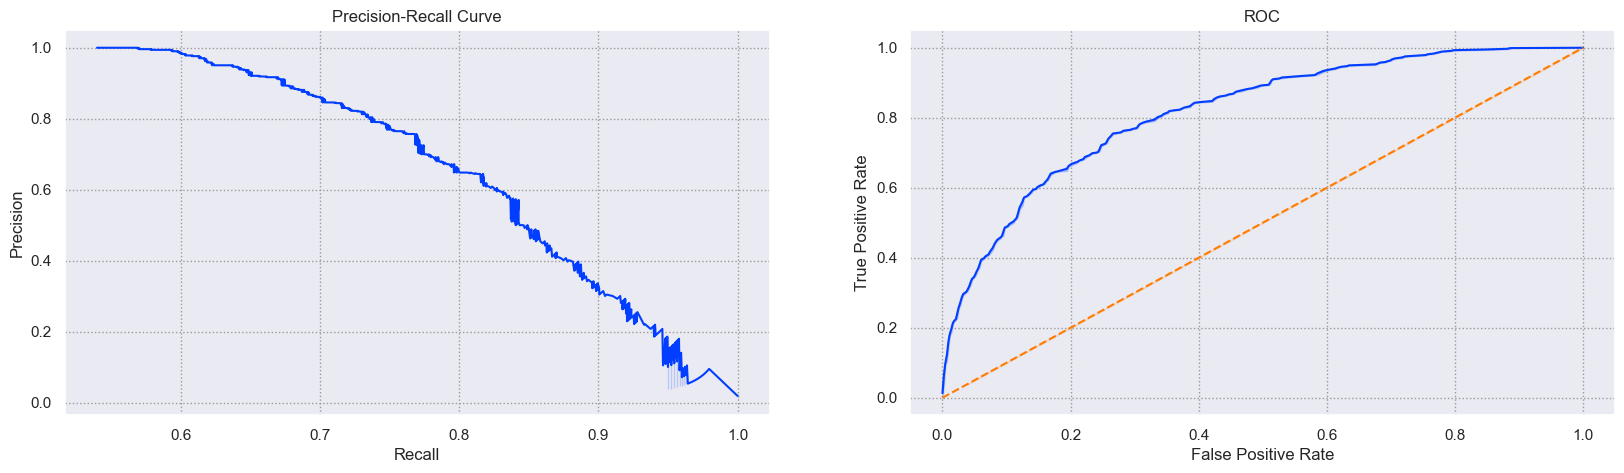

In [21]:
plot_metric(fcl31_true, fcl31_score)